In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# parametres: 
# N = nombre de données d'apprentissage 
# n2 = nombres de neurones dans la 2eme couche
# eta = pas dans la méthode du gradient à pas fixe (= learning rate)
# Nepoch = nombre d'epoch
# beta = parametre de la moyenne glissante

N = 120
n2 = 12
eta = 0.1
Nepoch = 3000
Nbatch = 12
Batch_size = 10
beta = 0.9
eps = 10**-8

In [3]:
# génération des données d'apprentissage       
X = np.random.rand(N) 
y = np.zeros((2,N))
n = int(N/2)
X[0:n] = np.sin(2*np.pi*X[0:n])
X[n:N] = np.exp(X[n:N])-1

y[0,0:n] = 1             
y[1,n:N] = 1

X = X.reshape(1,N)

In [4]:
def sigma(z):
    return 1/(1+np.exp(-z))

In [5]:
def sigma_prim(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [6]:
def softmax(z):
    
    u = 1.0/np.sum(np.exp(z), axis=0)
    
    return u*np.exp(z)

In [7]:
# Matrices poids et vecteurs biais du réseau de neurones

W2 = np.random.randn(n2,1)
b2 =np.random.randn(n2,1)

W3 = np.random.randn(2,n2)
b3 = np.random.randn(2,1)

In [8]:
# backpropagation

def compute_grad(x,y,W2,W3,b2,b3):
    A1 = x

    Z2 = W2@A1 + b2
    A2 = sigma(Z2)

    Z3 = W3@A2 + b3
    A3 = softmax(Z3)

    delta_3 = (A3-y)
    delta_2 = (np.transpose(W3)@delta_3)*sigma_prim(Z2)

    grad_W2 = delta_2@np.transpose(A1)
    grad_W3 = delta_3@np.transpose(A2)

    return grad_W2, grad_W3, delta_2, delta_3

In [9]:
# fonction cout

def cost(y,y_pred):
    xx = -np.sum(y*np.log(y_pred), axis=0)
    return np.sum(xx)/N

In [10]:
def model_predict(X,W2,W3,b2,b3):
    
    A1 = X

    Z2 = W2@A1 + b2
    A2 = sigma(Z2)

    Z3 = W3@A2 + b3
    A3 = softmax(Z3)
    
    return A3

In [11]:
# programme principal

Cost = np.zeros(Nepoch)
Acc = np.zeros(Nepoch)

U_W2 = np.zeros(W2.shape)
U_W3 = np.zeros(W3.shape)
U_b2 = np.zeros(b2.shape)
U_b3 = np.zeros(b3.shape)

for j in range(Nepoch):
    
    y_pred = model_predict(X,W2,W3,b2,b3)
    Cost[j] = cost(y,y_pred)
    Acc[j] = 1-0.5*np.sum(np.abs(np.round(y_pred)-y))/N
    X, y = shuffle(X.T, y.T)
    X = X.T
    y = y.T
    
    for k in range(Nbatch):
        
        dC_dW2 = np.zeros(W2.shape)
        dC_dW3 = np.zeros(W3.shape)
        dC_db2 = np.zeros(b2.shape)
        dC_db3 = np.zeros(b3.shape)
        
        for i in range(k*Batch_size,(k+1)*Batch_size):
        
            x_i = X[0,i].reshape(1,1)
            y_i = y[0:2,i].reshape(2,1)

            g_W2,g_W3,g_b2,g_b3 = compute_grad(x_i,y_i,W2,W3,b2,b3)

            dC_dW2 = dC_dW2 + g_W2
            dC_dW3 = dC_dW3 + g_W3
            dC_db2 = dC_db2 + g_b2
            dC_db3 = dC_db3 + g_b3
            
        U_W2 = beta*U_W2 + (1.0-beta)*dC_dW2*dC_dW2
        U_W3 = beta*U_W3 + (1.0-beta)*dC_dW3*dC_dW3
        U_b2 = beta*U_b2 + (1.0-beta)*dC_db2*dC_db2
        U_b3 = beta*U_b3 + (1.0-beta)*dC_db3*dC_db3
        
        H_W2 = 1/np.sqrt(U_W2+eps)
        H_W3 = 1/np.sqrt(U_W3+eps)
        H_b2 = 1/np.sqrt(U_b2+eps)
        H_b3 = 1/np.sqrt(U_b3+eps)
        
        W2 = W2 - (eta/Batch_size)*H_W2*dC_dW2
        W3 = W3 - (eta/Batch_size)*H_W3*dC_dW3
        b2 = b2 - (eta/Batch_size)*H_b2*dC_db2
        b3 = b3 - (eta/Batch_size)*H_b3*dC_db3

In [12]:
y_pred = model_predict(X,W2,W3,b2,b3)

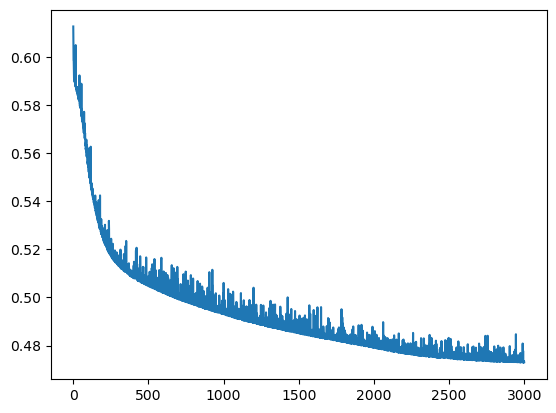

In [13]:
plt.plot(Cost)

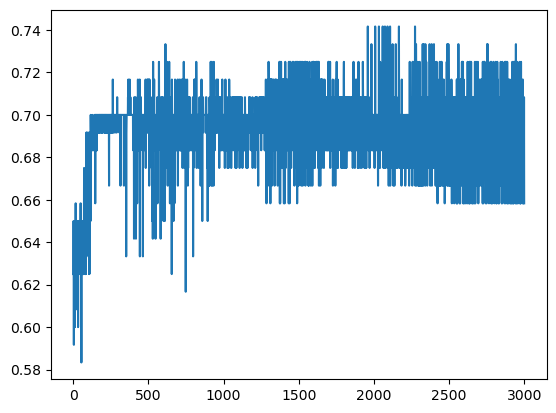

In [14]:
plt.plot(Acc)

In [15]:
# generate validation data
X = np.random.rand(N) 
y = np.zeros((2,N))
n = int(N/2)
X[0:n] = np.sin(2*np.pi*X[0:n])
X[n:N] = np.exp(X[n:N])-1

y[0,0:n] = 1             
y[1,n:N] = 1

X = X.reshape(1,N)

In [16]:
# prediction du modele
y_pred = model_predict(X,W2,W3,b2,b3)

# Calcul de la précision
print(1-0.5*np.sum(np.abs(np.round(y_pred)-y))/N)

0.75
